# SMM635 Mid-term Project Group2

## Long-term analysis

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import rc
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL
from bokeh.models import Legend, Title
from bokeh.layouts import gridplot, layout
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png

In [2]:
# load data
wd = os.getcwd()
in_file = os.path.join(wd, 'data', 'financials__long_term.csv')
LT = pd.read_csv(in_file)

In [3]:
# extract year from date column
LT.loc[:,'year'] = LT['date'].str[0:4]
# transform date series into datetime format
LT.loc[:,'date'] = pd.to_datetime(LT['date'],format='%Y-%m-%d')

In [4]:
LT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10860 entries, 0 to 10859
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   company_name    10860 non-null  object             
 1   country         10860 non-null  object             
 2   assets          10860 non-null  float64            
 3   price           10860 non-null  float64            
 4   sector          10860 non-null  object             
 5   operating       10860 non-null  float64            
 6   debt_to_assets  10860 non-null  float64            
 7   age             10860 non-null  int64              
 8   date            10860 non-null  datetime64[ns, UTC]
 9   year            10860 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(4)
memory usage: 848.6+ KB


In [24]:
# select relevant columns
LT = LT[['company_name', 'country', 'assets', 'sector', 'year']]

# remove duplicates
LT.drop_duplicates(inplace = True)

# create a new column
LT['sum_asset'] = LT['assets']

# count the sum of assets and set a new data frame
agg_table = pd.DataFrame(LT.groupby(['year', 'country', 'sector'])['sum_asset'].agg('sum'))

In [9]:
# reset index of agg_table
agg_table.reset_index(inplace = True)
agg_table

,year,country,sector,sum_asset
0,2014,france,consumer discretionary,106856.10
1,2014,france,consumer staples,184157.80
2,2014,france,energy and materials,258638.80
3,2014,france,financials,4251486.70
4,2014,france,industrials,415635.60
...,...,...,...,...
85,2018,united kingdom,consumer staples,387043.40
86,2018,united kingdom,energy and materials,106939.00
87,2018,united kingdom,financials,7172634.21
88,2018,united kingdom,industrials,122775.90


In [10]:
# drop 'sum_asset' from the original data
LT.drop(columns = 'sum_asset', inplace = True)
LT

,company_name,country,assets,sector,year
0,adidas,germany,12417.0,consumer discretionary,2014
12,adidas,germany,13343.0,consumer discretionary,2015
24,adidas,germany,15176.0,consumer discretionary,2016
36,adidas,germany,14019.0,consumer discretionary,2017
48,adidas,germany,15612.0,consumer discretionary,2018
...,...,...,...,...,...
10800,vallourec,france,9231.6,industrials,2014
10812,vallourec,france,6991.3,industrials,2015
10824,vallourec,france,8132.4,industrials,2016
10836,vallourec,france,6886.4,industrials,2017


In [11]:
# merge two data frames
agg_table = pd.merge(LT, agg_table, on = ['year', 'sector', 'country'], how = 'left')
agg_table

,company_name,country,assets,sector,year,sum_asset
0,adidas,germany,12417.0,consumer discretionary,2014,21671.6
1,adidas,germany,13343.0,consumer discretionary,2015,22298.0
2,adidas,germany,15176.0,consumer discretionary,2016,24274.4
3,adidas,germany,14019.0,consumer discretionary,2017,23113.4
4,adidas,germany,15612.0,consumer discretionary,2018,25670.9
...,...,...,...,...,...,...
903,vallourec,france,9231.6,industrials,2014,415635.6
904,vallourec,france,6991.3,industrials,2015,429795.2
905,vallourec,france,8132.4,industrials,2016,457125.9
906,vallourec,france,6886.4,industrials,2017,481145.2


In [12]:
# count weight
agg_table['weight'] = np.divide(agg_table.assets, agg_table.sum_asset)
agg_table

,company_name,country,assets,sector,year,sum_asset,weight
0,adidas,germany,12417.0,consumer discretionary,2014,21671.6,0.572962
1,adidas,germany,13343.0,consumer discretionary,2015,22298.0,0.598394
2,adidas,germany,15176.0,consumer discretionary,2016,24274.4,0.625185
3,adidas,germany,14019.0,consumer discretionary,2017,23113.4,0.606531
4,adidas,germany,15612.0,consumer discretionary,2018,25670.9,0.608159
...,...,...,...,...,...,...,...
903,vallourec,france,9231.6,industrials,2014,415635.6,0.022211
904,vallourec,france,6991.3,industrials,2015,429795.2,0.016267
905,vallourec,france,8132.4,industrials,2016,457125.9,0.017790
906,vallourec,france,6886.4,industrials,2017,481145.2,0.014313


In [15]:
# get the second dataframe
LT_1 = pd.read_csv(in_file)

In [16]:
# decompose date column
LT_1.loc[:, 'year'] = LT_1['date'].str[0:4]
# transform date series into datetime format
LT_1['date'] = pd.to_datetime(LT_1['date'],format='%Y-%m-%d')

In [17]:
LT_1 = pd.merge(LT_1,agg_table,on = ['company_name','year', 'sector', 'country'], how = 'left')

In [18]:
# transfer the UK 'pence' to 'pound'
LT_1.loc[LT_1['country'] == 'united kingdom','price'] = LT_1['price']/100

# calculate weighted price
LT_1.loc[:,'weighted_price'] = LT_1['price']*LT_1['weight']

In [19]:
# separate dataset by sector and country
sub_1 = LT_1[(LT_1['sector'] =='energy and materials') & (LT_1['country'] =='germany') ]
sub_2 = LT_1[(LT_1['sector'] =='energy and materials') & (LT_1['country'] =='france') ]
sub_3 = LT_1[(LT_1['sector'] =='energy and materials') & (LT_1['country'] =='united kingdom') ]

sub_4 = LT_1[(LT_1['sector'] =='consumer discretionary') & (LT_1['country'] =='germany') ]
sub_5 = LT_1[(LT_1['sector'] =='consumer discretionary') & (LT_1['country'] =='france') ]
sub_6 = LT_1[(LT_1['sector'] =='consumer discretionary') & (LT_1['country'] =='united kingdom') ]

sub_7 = LT_1[(LT_1['sector'] =='consumer staples') & (LT_1['country'] =='germany') ]
sub_8 = LT_1[(LT_1['sector'] =='consumer staples') & (LT_1['country'] =='france') ]
sub_9 = LT_1[(LT_1['sector'] =='consumer staples') & (LT_1['country'] =='united kingdom') ]

sub_10 = LT_1[(LT_1['sector'] =='utilities') & (LT_1['country'] =='germany') ]
sub_11 = LT_1[(LT_1['sector'] =='utilities') & (LT_1['country'] =='france') ]
sub_12 = LT_1[(LT_1['sector'] =='utilities') & (LT_1['country'] =='united kingdom') ]

sub_13 = LT_1[(LT_1['sector'] =='financials') & (LT_1['country'] =='germany') ]
sub_14 = LT_1[(LT_1['sector'] =='financials') & (LT_1['country'] =='france') ]
sub_15 = LT_1[(LT_1['sector'] =='financials') & (LT_1['country'] =='united kingdom') ]

sub_16 = LT_1[(LT_1['sector'] =='industrials') & (LT_1['country'] =='germany') ]
sub_17 = LT_1[(LT_1['sector'] =='industrials') & (LT_1['country'] =='france') ]
sub_18 = LT_1[(LT_1['sector'] =='industrials') & (LT_1['country'] =='united kingdom') ]

In [20]:
#calculate the sum of weighted price by date
sub_1_1 = pd.DataFrame(sub_1.groupby('date')['weighted_price'].aggregate(np.sum))
sub_2_1 = pd.DataFrame(sub_2.groupby('date')['weighted_price'].aggregate(np.sum))
sub_3_1 = pd.DataFrame(sub_3.groupby('date')['weighted_price'].aggregate(np.sum))

sub_4_1 = pd.DataFrame(sub_4.groupby('date')['weighted_price'].aggregate(np.sum))
sub_5_1 = pd.DataFrame(sub_5.groupby('date')['weighted_price'].aggregate(np.sum))
sub_6_1 = pd.DataFrame(sub_6.groupby('date')['weighted_price'].aggregate(np.sum))

sub_7_1 = pd.DataFrame(sub_7.groupby('date')['weighted_price'].aggregate(np.sum))
sub_8_1 = pd.DataFrame(sub_8.groupby('date')['weighted_price'].aggregate(np.sum))
sub_9_1 = pd.DataFrame(sub_9.groupby('date')['weighted_price'].aggregate(np.sum))

sub_10_1 = pd.DataFrame(sub_10.groupby('date')['weighted_price'].aggregate(np.sum))
sub_11_1 = pd.DataFrame(sub_11.groupby('date')['weighted_price'].aggregate(np.sum))
sub_12_1 = pd.DataFrame(sub_12.groupby('date')['weighted_price'].aggregate(np.sum))

sub_13_1 = pd.DataFrame(sub_13.groupby('date')['weighted_price'].aggregate(np.sum))
sub_14_1 = pd.DataFrame(sub_14.groupby('date')['weighted_price'].aggregate(np.sum))
sub_15_1 = pd.DataFrame(sub_15.groupby('date')['weighted_price'].aggregate(np.sum))

sub_16_1 = pd.DataFrame(sub_16.groupby('date')['weighted_price'].aggregate(np.sum))
sub_17_1 = pd.DataFrame(sub_17.groupby('date')['weighted_price'].aggregate(np.sum))
sub_18_1 = pd.DataFrame(sub_18.groupby('date')['weighted_price'].aggregate(np.sum))

In [21]:
# reset index
sub_1_1.reset_index(inplace = True)
sub_2_1.reset_index(inplace = True)
sub_3_1.reset_index(inplace = True)

sub_4_1.reset_index(inplace = True)
sub_5_1.reset_index(inplace = True)
sub_6_1.reset_index(inplace = True)

sub_7_1.reset_index(inplace = True)
sub_8_1.reset_index(inplace = True)
sub_9_1.reset_index(inplace = True)

sub_10_1.reset_index(inplace = True)
sub_11_1.reset_index(inplace = True)
sub_12_1.reset_index(inplace = True)

sub_13_1.reset_index(inplace = True)
sub_14_1.reset_index(inplace = True)
sub_15_1.reset_index(inplace = True)

sub_16_1.reset_index(inplace = True)
sub_17_1.reset_index(inplace = True)
sub_18_1.reset_index(inplace = True)

In [22]:
# input data
x1 = sub_1_1.loc[:,'date']
y1 = sub_1_1.loc[:,'weighted_price']
x2 = sub_2_1.loc[:,'date']
y2 = sub_2_1.loc[:,'weighted_price']
x3 = sub_3_1.loc[:,'date']
y3 = sub_3_1.loc[:,'weighted_price']

x4 = sub_4_1.loc[:,'date']
y4 = sub_4_1.loc[:,'weighted_price']
x5 = sub_5_1.loc[:,'date']
y5 = sub_5_1.loc[:,'weighted_price']
x6 = sub_6_1.loc[:,'date']
y6 = sub_6_1.loc[:,'weighted_price']

x7 = sub_7_1.loc[:,'date']
y7 = sub_7_1.loc[:,'weighted_price']
x8 = sub_8_1.loc[:,'date']
y8 = sub_8_1.loc[:,'weighted_price']
x9 = sub_9_1.loc[:,'date']
y9 = sub_9_1.loc[:,'weighted_price']

x10 = sub_10_1.loc[:,'date']
y10 = sub_10_1.loc[:,'weighted_price']
x11 = sub_11_1.loc[:,'date']
y11 = sub_11_1.loc[:,'weighted_price']
x12 = sub_12_1.loc[:,'date']
y12 = sub_12_1.loc[:,'weighted_price']

x13 = sub_13_1.loc[:,'date']
y13 = sub_13_1.loc[:,'weighted_price']
x14 = sub_14_1.loc[:,'date']
y14 = sub_14_1.loc[:,'weighted_price']
x15 = sub_15_1.loc[:,'date']
y15 = sub_15_1.loc[:,'weighted_price']

x16 = sub_16_1.loc[:,'date']
y16 = sub_16_1.loc[:,'weighted_price']
x17 = sub_17_1.loc[:,'date']
y17 = sub_17_1.loc[:,'weighted_price']
x18 = sub_18_1.loc[:,'date']
y18 = sub_18_1.loc[:,'weighted_price']

In [39]:
# create a new window
window_size = 30
window = np.ones(window_size)/float(window_size)

# output to static HTML file
output_file("Route 1.html", title="MTP.ipynb outcome")

# set tool bar
TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with a a datetime axis type
f1 = figure(tools=TOOLS, plot_width=800, plot_height=350, x_axis_type="datetime")
f2 = figure(tools=TOOLS, plot_width=800, plot_height=350, x_axis_type="datetime")
f3 = figure(tools=TOOLS, plot_width=800, plot_height=350, x_axis_type="datetime")
f4 = figure(tools=TOOLS, plot_width=800, plot_height=350, x_axis_type="datetime")
f5 = figure(tools=TOOLS, plot_width=800, plot_height=350, x_axis_type="datetime")
f6 = figure(tools=TOOLS, plot_width=800, plot_height=350, x_axis_type="datetime")

# add renderers
f1.line(x1, y1, color='navy', line_width=2, legend_label='DE')
f1.line(x2, y2, color='darkgreen', line_width=2, legend_label='FR')
f1.line(x3, y3, color='firebrick', line_width=2, legend_label='GB')

f2.line(x4, y4, color='navy', line_width=2)
f2.line(x5, y5, color='darkgreen', line_width=2)
f2.line(x6, y6, color='firebrick', line_width=2)

f3.line(x7, y7, color='navy', line_width=2)
f3.line(x8, y8, color='darkgreen', line_width=2)
f3.line(x9, y9, color='firebrick', line_width=2)

f4.line(x10, y10, color='navy', line_width=2)
f4.line(x11, y11, color='darkgreen',line_width=2)
f4.line(x12, y12, color='firebrick',line_width=2)

f5.line(x13, y13, color='navy', line_width=2)
f5.line(x14, y14, color='darkgreen',line_width=2)
f5.line(x15, y15, color='firebrick',line_width=2)

f6.line(x16, y16, color='navy',line_width=2)
f6.line(x17, y17, color='darkgreen',line_width=2)
f6.line(x18, y18, color='firebrick',line_width=2)

# personalization
f1.title.text = "Stock Prices in 2014-2018 by Sector & Country"
f1.legend.location = "top_left"
f1.grid.grid_line_alpha = 0
f1.xaxis.axis_label = 'Year'
f1.yaxis.axis_label = 'Price'
f1.ygrid.band_fill_color = '#d0d1e6'
f1.ygrid.band_fill_alpha = 0.4
f1.add_layout(Title(text="Energy and Materials", text_font_style="italic"), 'above')

f2.grid.grid_line_alpha = 0
f2.xaxis.axis_label = 'Year'
f2.yaxis.axis_label = 'Price'
f2.ygrid.band_fill_color = '#d0d1e6'
f2.ygrid.band_fill_alpha = 0.4
f2.add_layout(Title(text="Consumer Discretionary", text_font_style="italic"), 'above')

f3.grid.grid_line_alpha = 0
f3.xaxis.axis_label = 'Year'
f3.yaxis.axis_label = 'Price'
f3.ygrid.band_fill_color = '#d0d1e6'
f3.ygrid.band_fill_alpha = 0.4
f3.add_layout(Title(text="Consumer Staples", text_font_style="italic"), 'above')

f4.grid.grid_line_alpha = 0
f4.xaxis.axis_label = 'Year'
f4.yaxis.axis_label = 'Price'
f4.ygrid.band_fill_color = '#d0d1e6'
f4.ygrid.band_fill_alpha = 0.4
f4.add_layout(Title(text="Utilities", text_font_style="italic"), 'above')

f5.grid.grid_line_alpha = 0
f5.xaxis.axis_label = 'Year'
f5.yaxis.axis_label = 'Price'
f5.ygrid.band_fill_color = '#d0d1e6'
f5.ygrid.band_fill_alpha = 0.4
f5.add_layout(Title(text="Financials", text_font_style="italic"), 'above')

f6.grid.grid_line_alpha = 0
f6.xaxis.axis_label = 'Year'
f6.yaxis.axis_label = 'Price'
f6.ygrid.band_fill_color = '#d0d1e6'
f6.ygrid.band_fill_alpha = 0.4
f6.add_layout(Title(text="Industrials", text_font_style="italic"), 'above')

# integrate the figures
grid = gridplot([f1,f2,f3,f4,f5,f6],ncols=3, plot_width=450,plot_height=300)
export_png(grid, filename="Long_term.png")
show(grid)


## Short-term analysis

In [40]:
# load data
in_file_1 = os.path.join(wd, 'data', 'financials__short_term.csv')
ST = pd.read_csv(in_file_1)

In [51]:
# setup
rc('font',**{'family':'serif','serif':['Avant Garde']})
rc('text', usetex=False)

In [42]:
# decompose date column
ST.loc[:, 'year'] = ST['date'].str[0:4]
# transform date series into datetime format
ST.loc[:, 'date'] = ST['date'].str[0:10]
ST.loc[:,'date'] = pd.to_datetime(ST['date'],format='%Y-%m-%d')

In [43]:
# select only relevant columns
ST = ST[['company_name', 'country', 'assets', 'sector', 'year']]
# remove duplicates
ST.drop_duplicates(inplace = True)
ST['sum_asset'] = ST['assets']

In [44]:
agg_table_ST = pd.DataFrame(ST.groupby(['year', 'country', 'sector'])['sum_asset'].agg('sum'))
agg_table_ST.reset_index(inplace = True)
ST.drop(columns = 'sum_asset', inplace = True)

In [45]:
agg_table_ST = pd.merge(ST, agg_table_ST, on = ['year', 'sector', 'country'], how = 'left')
agg_table_ST['weight'] = np.divide(agg_table_ST.assets, agg_table_ST.sum_asset)
agg_table_ST

,company_name,country,assets,sector,year,sum_asset,weight
0,adidas,germany,15176.0,consumer discretionary,2016,24274.4,0.625185
1,allianz,germany,883809.0,financials,2016,3274418.0,0.269913
2,basf,germany,76496.0,energy and materials,2016,190835.0,0.400849
3,bmw,germany,172174.0,industrials,2016,1106129.9,0.155654
4,continental,germany,36175.0,industrials,2016,1106129.9,0.032704
...,...,...,...,...,...,...,...
165,nexans,france,5296.0,industrials,2016,397471.2,0.013324
166,nexity,france,5248.6,financials,2016,3508390.7,0.001496
167,plastic omnium,france,5145.4,industrials,2016,397471.2,0.012945
168,rexel,france,10761.6,industrials,2016,397471.2,0.027075


In [46]:
# get another dataframe
ST_1 = pd.read_csv(in_file_1)

In [47]:
# decompose date column
ST_1.loc[:, 'year'] = ST_1['date'].str[0:4]
# transform date series into datetime format
ST_1.loc[:, 'date'] = ST_1['date'].str[0:10]
ST_1['date'] = pd.to_datetime(ST_1['date'],format='%Y-%m-%d')

In [48]:
ST_1 = pd.merge(ST_1,agg_table_ST,on = ['company_name','year', 'sector', 'country'], how = 'left')

In [49]:
ST_1.loc[ST_1['country'] == 'united kingdom','price'] = ST_1['price']
ST_1.loc[:,'weighted_price'] = ST_1['price']*ST_1['weight']
df = ST_1[(ST_1['country'] =='united kingdom')]
df = pd.DataFrame(df.groupby('date')['weighted_price'].aggregate(np.sum))
df.reset_index(inplace = True)

ConversionError: Failed to convert value(s) to axis units: ['2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01']

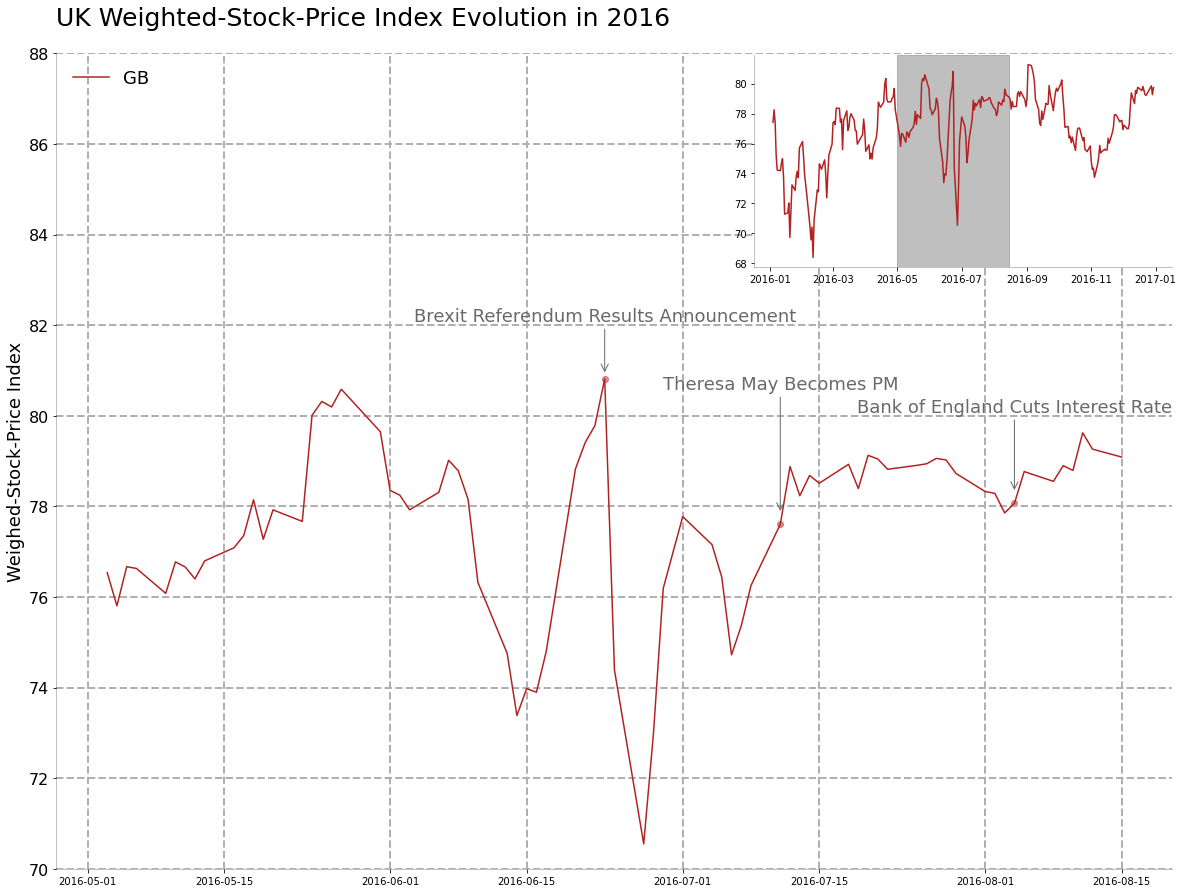

In [56]:
# visualization
plt.style.use('seaborn-pastel')

# figure
fig = plt.figure(figsize=(20, 15))
# plot
ax = fig.add_subplot(111)

# data series
# --+ slice
slice = ((df['date'] >= pd.Timestamp(2016, 5, 1)) &
         (df['date'] <= pd.Timestamp(2016, 8, 15)))

# --+ time
x0 = df.loc[slice, 'date']
y0 = df.loc[slice, 'weighted_price']

# plot data and add legend
ax.plot(x0, y0, color='firebrick', label='GB')
ax.legend(loc='upper left', fontsize=18, frameon=False)

# plot title
ax.set_title('UK Weighted-Stock-Price Index Evolution in 2016',fontsize=25, pad=28, loc='left')

# add a grid 
ax.grid(linestyle='--', linewidth='2')

# lighten borders
ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(.3)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(.3)


# inset# draw graph in inset
axins = inset_axes(ax, width="50%", height="40%", bbox_to_anchor=(.259, .543, .75, .65),
                   bbox_transform=ax.transAxes, loc=5, borderpad=1)
axins.plot(df['date'], df['weighted_price'], color='firebrick')
axins.axvspan(pd.Timestamp(2016, 5, 1), pd.Timestamp(2016, 8, 15),
              color='gray', alpha=0.5)
axins.spines["top"].set_alpha(0)
axins.spines["bottom"].set_alpha(.3)
axins.spines["right"].set_alpha(0)
axins.spines["left"].set_alpha(.3)


# --+ Brexit Referendum
# critical events
lb = pd.Timestamp(2016, 6, 23)
lb_y = df.loc[df['date'] == lb,'weighted_price'].values
sep=0.1
ax.scatter(lb, lb_y, marker='o', color='firebrick', alpha=0.5)
ax.annotate("Brexit Referendum Results Announcement",fontsize=18,
            xy=(lb, lb_y+sep ), xycoords='data',
            xytext=(lb, 82), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec="dimgrey",
                        connectionstyle="arc3"),)

# --+ Theresa May becomes PM
# critical events
lb = pd.Timestamp(2016, 7, 11)
lb_y = df.loc[df['date'] == lb,'weighted_price'].values
sep=0.25
ax.scatter(lb, lb_y, marker='o', color='firebrick', alpha=0.5)
ax.annotate("Theresa May Becomes PM",fontsize=18,
            xy=(lb, lb_y+sep ), xycoords='data',
            xytext=(lb, 80.5), textcoords='data',
            color='dimgrey', 
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec="dimgrey",
                        connectionstyle="arc3"),)

# --+ Bank of England cuts interest rate
# critical events
lb = pd.Timestamp(2016, 8, 4)
lb_y = df.loc[df['date'] == lb,'weighted_price'].values
sep=0.25
ax.scatter(lb, lb_y, marker='o', color='firebrick', alpha=0.5)
ax.annotate("Bank of England Cuts Interest Rate",fontsize=18,
            xy=(lb, lb_y+sep ), xycoords='data',
            xytext=(lb, 80), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec="dimgrey",
                        connectionstyle="arc3"),)

# axes
pos=np.arange(70,90,2)
ax.yaxis.set_ticks(pos)
ax.set_ylabel(r'Weighed-Stock-Price Index',fontsize=18)
ax.set_yticklabels(pos,fontsize=16)

date=['May','June','July','August']
pos= ['2016-05-01','2016-06-01','2016-07-01','2016-08-01']
ax.xaxis.set_ticks(pos)
ax.set_xticklabels(date, fontsize=16)
plt.savefig(UK-Short_term, format='png')